In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from textutils import TextProcessor

## English

#### Prepare text for analysis 

In [2]:
print TextProcessor.__doc__

Text processor class
    Make sure you have all your documents in UTF-8 encoding
    
    Attributes:
        processed_dir (str): Proccessed files folder
        vocabulary (dict): All languages vocabularies (available: 'rus', 'eng', 'eng_con', 'eng_vow')
    
    Functions:
        """ Remove all unneccessary symbols from .txt file
        preprocess_document(document_path, document_name, lang='eng')

        """ Remove all unneccessary symbols from every .txt file in :folder_path
        preprocess_folder(folder_path, lang='eng', join=False)
    


In [5]:
%time TextProcessor.preprocess_folder('wiki_data/english', lang='en_con', join=False)

Try to preprocess documents in wiki_data/english
	---> wiki_data/english/all.txt
Files are successfully processed to wiki_data/english/processed
CPU times: user 2min 35s, sys: 3.64 s, total: 2min 39s
Wall time: 2min 39s


In [7]:
with open('wiki_data/english/processed/all.txt', 'r') as processed_file:
    english_all = processed_file.read().replace('\n', '')

In [8]:
print "Длина документа: " + str(len(english_all))
english_all[:1000]

Длина документа: 115290080


'nrchsmnrchsmspltclphlsphthtdvctsslfgvrndsctsbsdnvlntrnstttnsthsrftndscrbdssttlsssctslthghsvrlthrshvdfndthmmrspcfcllsnstttnsbsdnnnhrrchclfrssctnsnrchsmhldsthstttbndsrblnncssrndhrmflwhlntsttsmscntrlnrchsmntlsppsngthrtrhrrchclrgnstnnthcndctfllhmnrltnsncldngbtntlmtdtthsttsstmnrchsmdsntffrfxdbdfdctrnfrmsnglprtclrwrldvwnstdflxngndflwngsphlsphmntpsndtrdtnsfnrchsmxstntllfwhchrmtllxclsvnrchstschlsfthghtcndffrfndmntllspprtngnthngfrmxtrmndvdlsmtcmpltcllctvsmstrnsfnrchsmhvftnbndvddntthctgrsfsclndndvdlstnrchsmrsmlrdlclssfctnsnrchsmssllcnsdrdrdcllftwngdlgndmchfnrchstcnmcsndnrchstlglphlsphrflctntthrtrnntrprttnsfcmmnsmcllctvsmsndclsmmtlsmrprtcptrcnmcsthtrmnrchsmscmpndwrdcmpsdfrmthwrdnrchndthsffxsmthmslvsdrvdrspctvlfrmthgrknrchfrmnrchsmnngnwthtrlrsfrmthprvtvprfxnwthtndrchsldrrlrcfrchnrrkhthrtsvrgntrlmmgstrcndthsffxrsmssmfrmthvrblnfntvsffxznthfrstknwnsfthswrdwsnvrsfctnswthnthfrnchrvltnlblldppnntssnrchstssrbsprrddthhbrtstslthghfwshrdmnvwsfltrnrchststhrwldbmnrvltnrsfthrlnntnthcntrwhcntrbtdtthnrchstdctrns

In [9]:
from textutils import TextUtils

normalized_dict = TextUtils.get_normalized_dict (
    TextUtils.get_n_gram_dict(english_all, 1, lang='en_con')
)
ordered_dict = TextUtils.get_ordered_dict(normalized_dict, by='value', reverse=True)

In [10]:
def draw__ordered_dict(dct, size=(10, 8)):
    non_zero_items = np.array(dct)[:,0].astype(str)
    non_zero_values = np.array(ordered_dict)[:,1].astype(np.float64)
    
    plt.figure(figsize=size)
    ax = sns.barplot(x=non_zero_items, y=non_zero_values, color="#666699")
    
    ax.set_ylabel('Probabilities')
    ax.set_title('Text symbols distribution')
    ax.set_xticklabels(non_zero_items)
    
    plt.show()

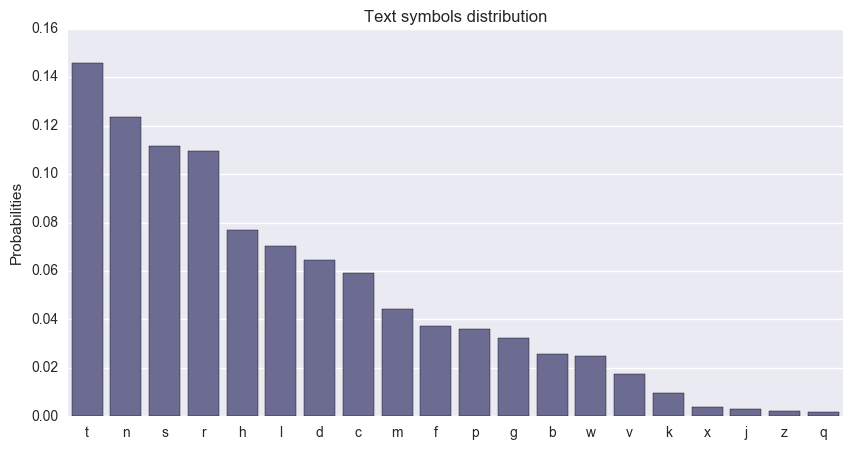

In [11]:
draw__ordered_dict(ordered_dict, (10, 5))

#### Caculate Hurst values for 't' letter

In [20]:
from textutils import HurstExponent
hurst = HurstExponent(english_all, 't')

In [21]:
len(hurst.distances)

16809784

In [22]:
%time hurst.calculate(10000)

CPU times: user 36min 22s, sys: 23.7 s, total: 36min 46s
Wall time: 38min 13s


#### Distribution for Wikipedia articles 

(array([   4.,   19.,   27.,   71.,   95.,  138.,  185.,  220.,  207.,
         173.,  176.,  145.,  104.,   49.,   42.,   12.,    8.,    2.,
           2.,    1.]),
 array([ 0.31728835,  0.35472821,  0.39216807,  0.42960793,  0.46704779,
         0.50448765,  0.54192751,  0.57936737,  0.61680723,  0.65424709,
         0.69168695,  0.72912681,  0.76656667,  0.80400653,  0.84144639,
         0.87888625,  0.9163261 ,  0.95376596,  0.99120582,  1.02864568,
         1.06608554]),
 <a list of 20 Patch objects>)

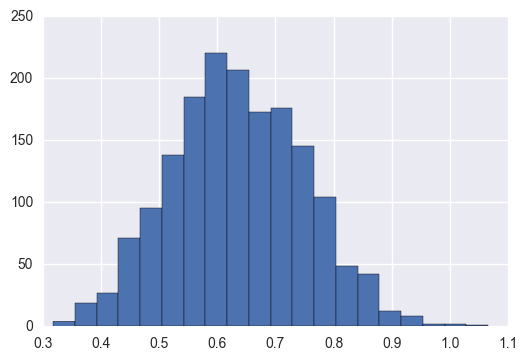

In [26]:
plt.hist(hurst.hurst_values, 20)

#### Distribution for novels

(array([  4.,   9.,  19.,  26.,  22.,  16.,   5.,   1.,   1.,   1.]),
 array([ 0.30823515,  0.37131927,  0.43440339,  0.49748751,  0.56057162,
         0.62365574,  0.68673986,  0.74982398,  0.81290809,  0.87599221,
         0.93907633]),
 <a list of 10 Patch objects>)

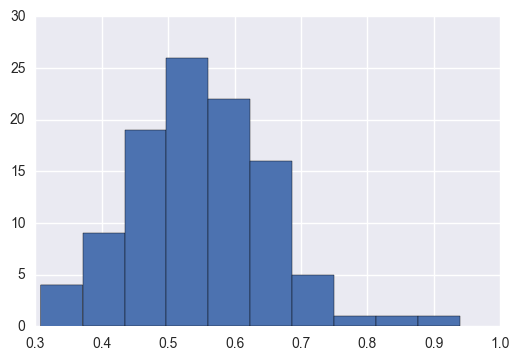

In [12]:
plt.hist(hurst.hurst_values)

In [29]:
with open('hurst_values/english.txt', 'w') as outfile:
    for v in hurst.hurst_values:
        outfile.write(str(v) + '\n')

#### Caculate Hurst values for 'n' letter

CPU times: user 3min 22s, sys: 2.79 s, total: 3min 25s
Wall time: 3min 28s


(array([  6.,   7.,   9.,  11.,  16.,   8.,  12.,   2.,   3.,   3.]),
 array([ 0.34603426,  0.39125482,  0.43647538,  0.48169594,  0.5269165 ,
         0.57213706,  0.61735763,  0.66257819,  0.70779875,  0.75301931,
         0.79823987]),
 <a list of 10 Patch objects>)

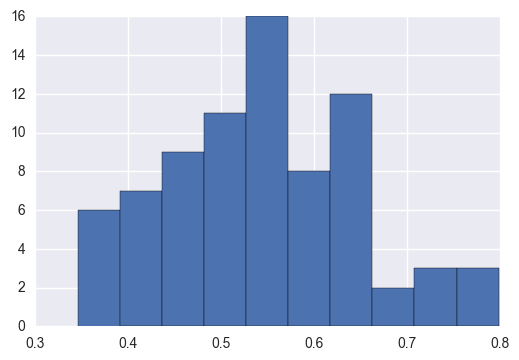

In [16]:
hurst = HurstExponent(english_all, 'n')
%time hurst.calculate(10000)
plt.hist(hurst.hurst_values)

In [17]:
len(hurst.distances)

779582

#### Caculate Hurst values for 's' letter

CPU times: user 1min 38s, sys: 971 ms, total: 1min 39s
Wall time: 1min 40s


(array([  2.,   1.,   6.,  11.,   9.,  12.,  11.,  11.,   6.,   2.]),
 array([ 0.30522963,  0.35389658,  0.40256353,  0.45123048,  0.49989743,
         0.54856438,  0.59723133,  0.64589827,  0.69456522,  0.74323217,
         0.79189912]),
 <a list of 10 Patch objects>)

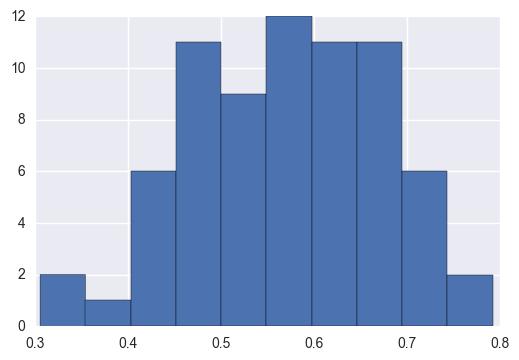

In [14]:
hurst = HurstExponent(english_all, 's')
%time hurst.calculate(10000)
plt.hist(hurst.hurst_values)

In [15]:
len(hurst.distances)

710308